In [6]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import scienceplots
plt.style.use('science')

from exod.processing.bayesian_computations import *


In [2]:
threshold_sigma = 5
B_peak_threshold, B_eclipse_threshold = get_bayes_thresholds(threshold_sigma=threshold_sigma)

range_mu       = np.geomspace(start=1e-7, stop=1e3, num=50000) #
range_mu_large = np.geomspace(start=1e3, stop=1e6, num=1000)   # Above 1000

tab_npeak, tab_neclipse = [], []
for mu in tqdm(range_mu):
    # Find the smallest observed (n) value for a peak
    range_n_peak = np.arange(max(10 * int(mu), 100))
    B_factors = B_peak_log(n=range_n_peak, mu=mu)
    n_peak_min = range_n_peak[B_factors > B_peak_threshold][0]
    tab_npeak.append(n_peak_min)

    # Get the largest observed (n) value for an eclipse
    range_n_eclipse = np.arange(2 * int(mu) + 1)
    B_factors = B_eclipse_log(n=range_n_eclipse, mu=mu)
    n_eclipse_max = range_n_eclipse[B_factors < B_eclipse_threshold][0]
    tab_neclipse.append(n_eclipse_max)

tab_npeak    += list(n_peak_large_mu(range_mu_large, threshold_sigma))
tab_neclipse += list(n_eclipse_large_mu(range_mu_large, threshold_sigma))

range_mu = np.concatenate((range_mu, range_mu_large))

  0%|                                                                                                                                                                                                               | 0/50000 [00:00<?, ?it/s]/home/nkhan/EXOD2/exod/processing/bayesian_computations.py:27: RuntimeWarning: divide by zero encountered in log10
  return np.log10(gammaincc(n + 1, mu)) - np.log10(poisson.pmf(n, mu))
 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 49262/50000 [00:09<00:00, 1172.95it/s]/home/nkhan/EXOD2/exod/processing/bayesian_computations.py:27: RuntimeWarning: invalid value encountered in subtract
  return np.log10(gammaincc(n + 1, mu)) - np.log10(poisson.pmf(n, mu))
/home/nkhan/EXOD2/exod/processing/bayesian_computations.py:32: RuntimeWarning: divide by zero encountered in log10
  return np.log10(gammainc(n + 1, m

In [3]:
tab_npeak_3sig = tab_npeak
tab_neclipse_3sig = tab_neclipse

In [4]:
threshold_sigma = 5
B_peak_threshold, B_eclipse_threshold = get_bayes_thresholds(threshold_sigma=threshold_sigma)

range_mu       = np.geomspace(start=1e-7, stop=1e3, num=50000) #
range_mu_large = np.geomspace(start=1e3, stop=1e6, num=1000)   # Above 1000

tab_npeak, tab_neclipse = [], []
for mu in tqdm(range_mu):
    # Find the smallest observed (n) value for a peak
    range_n_peak = np.arange(max(10 * int(mu), 100))
    B_factors = B_peak_log(n=range_n_peak, mu=mu)
    n_peak_min = range_n_peak[B_factors > B_peak_threshold][0]
    tab_npeak.append(n_peak_min)

    # Get the largest observed (n) value for an eclipse
    range_n_eclipse = np.arange(2 * int(mu) + 1)
    B_factors = B_eclipse_log(n=range_n_eclipse, mu=mu)
    n_eclipse_max = range_n_eclipse[B_factors < B_eclipse_threshold][0]
    tab_neclipse.append(n_eclipse_max)

tab_npeak    += list(n_peak_large_mu(range_mu_large, threshold_sigma))
tab_neclipse += list(n_eclipse_large_mu(range_mu_large, threshold_sigma))

range_mu = np.concatenate((range_mu, range_mu_large))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4848.64it/s]


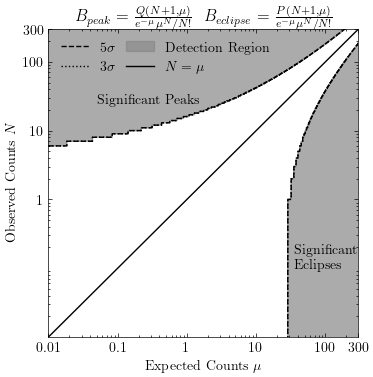

In [7]:
# Visualization
plt.figure(figsize=(4, 4))

plt.plot(range_mu, tab_npeak, ls='--', c='k', label=fr'5$\sigma$', lw=1.0)
plt.plot(range_mu, tab_neclipse, ls='--', c='k', lw=1.0)

plt.plot(range_mu, tab_npeak_3sig, ls=':', c='k', label=fr'3$\sigma$', lw=1.0)
plt.plot(range_mu, tab_neclipse_3sig, ls=':', c='k', lw=1.0)

plt.fill_between(range_mu, tab_npeak, 1e6, alpha=0.5, color='grey', label='Detection Region')
plt.fill_between(range_mu, tab_npeak_3sig, 1e6, alpha=0.3, color='grey')
plt.fill_between(range_mu, 0, tab_neclipse, alpha=0.5, color='grey')
plt.fill_between(range_mu, 0, tab_neclipse_3sig, alpha=0.3, color='grey')


plt.plot(range_mu, range_mu, label=r'$N=\mu$', color='black')
#plt.fill_between(range_mu, range_mu-5*np.sqrt(range_mu), range_mu+5*np.sqrt(range_mu), alpha=0.3, label=fr'Naive $5 \sigma$', color='grey')
#plt.fill_between(range_mu, range_mu-3*np.sqrt(range_mu), range_mu+3*np.sqrt(range_mu), alpha=0.5, label=fr'Naive $3 \sigma$', color='grey')
plt.yscale('log')
plt.xscale('log')
plt.title(r'$B_{peak} = \frac{Q(N+1, \mu)}{e^{-\mu} \mu^{N} / N!} \ \  B_{eclipse} = \frac{P(N+1, \mu)}{e^{-\mu} \mu^{N} / N!}$')
plt.xlabel(fr'Expected Counts $\mu$')
plt.ylabel(fr'Observed Counts $N$')
plt.xlim(min(range_mu), max(range_mu))
plt.ylim(min(range_mu), max(range_mu))
plt.text(0.05, 25, s='Significant Peaks', )
plt.text(35, 0.1, s='Significant\nEclipses')
plt.yticks([1, 10, 100, 300], labels=[1, 10, 100, 300])
plt.xticks([0.01, 0.1, 1, 10, 100, 300], labels=[0.01, 0.1, 1, 10, 100, 300])
plt.xlim(0.01, 300)
plt.ylim(0.01, 300)
plt.legend(loc='upper left', fontsize=10, ncol=2, columnspacing=0.8)
#plt.tight_layout()
plt.savefig(data_plots / f'bayesfactorlimits_3_5.pdf')
plt.savefig(data_plots / f'bayesfactorlimits_3_5.png')
plt.show()